## Introduction

This is the data repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE). Also, Supported by ESRI Living Atlas Team and the Johns Hopkins University Applied Physics Lab (JHU APL).

Coronavirus is a family of viruses that can cause illness, which can vary from common cold and cough to sometimes more severe disease. Middle East Respiratory Syndrome (MERS-CoV) and Severe Acute Respiratory Syndrome (SARS-CoV) were such severe cases with the world already has faced. SARS-CoV-2 (n-coronavirus) is the new virus of the coronavirus family, which first discovered in 2019, which has not been identified in humans before. It is a contiguous virus which started from Wuhan in December 2019. Which later declared as Pandemic by WHO due to high rate spreads throughout the world. Currently (on the date 20 May 2020), this leads to a total of 300K+ Deaths across the globe, including 90K+ deaths alone in USA.The dataset  is provided to identify the deaths and recovered cases.



### Field description

Province_State - The name of the State within the USA.

Country_Region - The name of the Country (US).


Last_Update - The most recent date the file was pushed.


Lat - Latitude.


Long_ - Longitude.


Confirmed - Aggregated confirmed case count for the state.


Deaths - Aggregated Death case count for the state.


Recovered - Aggregated Recovered case count for the state.


Active - Aggregated confirmed cases that have not been resolved (Active = Confirmed - Recovered - Deaths).


FIPS - Federal Information Processing Standards code that uniquely identifies counties within the USA.


Incident_Rate - confirmed cases per 100,000 persons.


People_Tested - Total number of people who have been tested.


People_Hospitalized - Total number of people hospitalized.


Mortality_Rate - Number recorded deaths * 100/ Number confirmed cases.


UID - Unique Identifier for each row entry.


ISO3 - Officialy assigned country code identifiers.


Testing_Rate - Total number of people tested per 100,000 persons.


Hospitalization_Rate - Total number of people hospitalized * 100/ Number of confirmed cases.

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import zscore
import plotly.graph_objects as go

from sklearn.preprocessing import LabelEncoder


import folium


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm


import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category = DeprecationWarning)

In [185]:
covid = pd.read_csv('Covid19_USA.csv')

In [186]:
covid_df =pd.DataFrame() #Creating duplicate Dataframe (covid_df) for random operations
covid_df = covid
covid_df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


## Data Wrangling (Data Cleaning)/EDA:-

### Dimensions of the data

We can get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the shape property.

In [187]:
covid_df.shape

(58, 18)

In [188]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             42 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         56 non-null     float64
 11  People_Tested         56 non-null     float64
 12  People_Hospitalized   33 non-null     float64
 13  Mortality_Rate        57 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

In [189]:
covid_df.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

In the given data, there are null values presented, to confirm again we use heat map

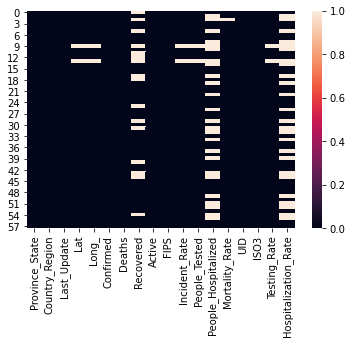

In [190]:
sns.heatmap(covid_df.isnull())

Filling null values with mean is the best option for as most of these are continues variables

In [191]:
covid_df.fillna(covid_df.mean(), inplace=True)

In [192]:
covid_df.isnull().sum()

Province_State          0
Country_Region          0
Last_Update             0
Lat                     0
Long_                   0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

### Processing data by defining categorical and numerical values

In [193]:
#Dividing dataframe columns into two lists one is categorical and another is continues
categorical_feat = []
continous_feat = []
for column in covid_df.columns:
    print('************************************')
    print(f"{column} : {covid_df[column].unique()}")
    if len(covid_df[column].unique()) <= 10:
        categorical_feat.append(column)
    else:
        continous_feat.append(column)

************************************
Province_State : ['Alabama' 'Alaska' 'American Samoa' 'Arizona' 'Arkansas' 'California'
 'Colorado' 'Connecticut' 'Delaware' 'Diamond Princess'
 'District of Columbia' 'Florida' 'Georgia' 'Grand Princess' 'Guam'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Northern Mariana Islands' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Puerto Rico' 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee'
 'Texas' 'Utah' 'Vermont' 'Virgin Islands' 'Virginia' 'Washington'
 'West Virginia' 'Wisconsin' 'Wyoming']
************************************
Country_Region : ['US']
************************************
Last_Update : ['2020-05-21 02:32:54']
************************************
Lat : [ 32.3182      61.3707     -14.271       3

In [194]:
print(categorical_feat )

['Country_Region', 'Last_Update', 'ISO3']


In [195]:
print(continous_feat)

['Province_State', 'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate', 'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'Testing_Rate', 'Hospitalization_Rate']


From the data we observed, in categorical data Country region and last update are single values and has no impact on data, so we can remove them from dataframe for further proceedings

In [196]:
covid_df = covid_df.drop(['Country_Region', 'Last_Update'], axis=1)

In [197]:
covid_df.head()

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,32.3182,-86.9023,13052,522,7007.428571,12530.0,1,266.194321,164450.0,1493.000000,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,61.3707,-152.4044,401,10,352.000000,39.0,2,54.815493,37045.0,4897.454545,2.493766,84000002,USA,5063.940017,14.342541
2,American Samoa,-14.2710,-170.1320,0,0,7007.428571,0.0,60,0.000000,124.0,4897.454545,4.458248,16,ASM,222.857246,14.342541
3,Arizona,33.7298,-111.4312,14906,747,3773.000000,10386.0,4,204.788838,165435.0,1792.000000,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,34.9697,-92.3731,5003,107,3852.000000,1044.0,5,165.782801,96258.0,535.000000,2.138717,84000005,USA,3189.670370,10.693584


### Label Encoding

In [198]:
le = LabelEncoder()
covid_df['ISO3'] = le.fit_transform(covid_df['ISO3'])

In [199]:
covid_df.head()

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,32.3182,-86.9023,13052,522,7007.428571,12530.0,1,266.194321,164450.0,1493.000000,3.999387,84000001,4,3353.942386,11.438860
1,Alaska,61.3707,-152.4044,401,10,352.000000,39.0,2,54.815493,37045.0,4897.454545,2.493766,84000002,4,5063.940017,14.342541
2,American Samoa,-14.2710,-170.1320,0,0,7007.428571,0.0,60,0.000000,124.0,4897.454545,4.458248,16,0,222.857246,14.342541
3,Arizona,33.7298,-111.4312,14906,747,3773.000000,10386.0,4,204.788838,165435.0,1792.000000,5.011405,84000004,4,2272.859351,12.022005
4,Arkansas,34.9697,-92.3731,5003,107,3852.000000,1044.0,5,165.782801,96258.0,535.000000,2.138717,84000005,4,3189.670370,10.693584


### Statistical Summary

In [200]:
covid_df.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,5.800000e+01,58.000000,58.000000,5.800000e+01,58.000000,58.000000,58.000000
mean,36.840089,-85.206614,26756.086207,1611.017241,7007.428571,20070.724138,3288.086207,396.230806,2.258534e+05,4897.454545,4.458248,7.676194e+07,3.844828,3894.186870,14.342541
std,10.694329,48.873770,52562.031122,4084.750891,9901.304545,41294.705318,17408.350591,395.554852,2.934948e+05,9879.577790,2.116191,2.378302e+07,0.720665,1898.951207,3.781861
min,-14.271000,-170.132000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,0.000000,1.600000e+01,0.000000,97.702058,6.778043
25%,34.872800,-99.697700,2596.000000,74.000000,1281.750000,812.500000,18.250000,154.909239,4.745000e+04,1454.500000,3.116158,8.400001e+07,4.000000,2741.843521,12.829963
50%,38.978600,-86.797300,10148.500000,385.000000,4987.000000,5644.500000,32.500000,259.009335,1.433085e+05,4897.454545,4.409323,8.400003e+07,4.000000,3501.526835,14.342541
75%,42.214075,-77.072550,29395.500000,1394.250000,7007.428571,19291.250000,47.750000,462.828082,2.646656e+05,4897.454545,5.450908,8.400004e+07,4.000000,4622.586404,15.552021
max,61.370700,145.673900,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,9.545549,8.410000e+07,5.000000,11377.424693,28.054438


### Data Visualization

Text(0.5, 1.0, 'correlation with target variable')

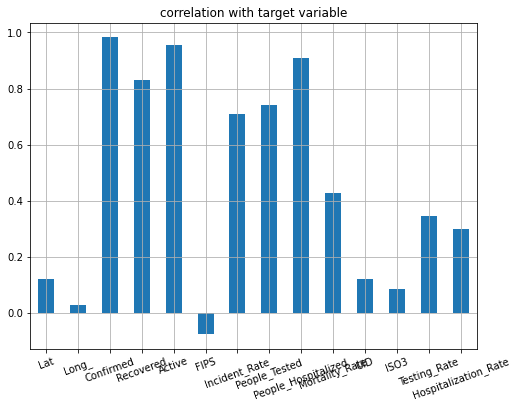

In [201]:
plt.figure(figsize=(8,6))
covid_df.drop('Deaths', axis =1).corrwith(covid_df['Deaths']).plot(kind='bar', grid=True)
plt.xticks(rotation=20)
plt.title('correlation with target variable')

Confirmed cases are highly correlated to Deaths, Active, people tested are also highly correlated after confirmed cases.

Text(0.5, 1.0, 'correlation with target variable')

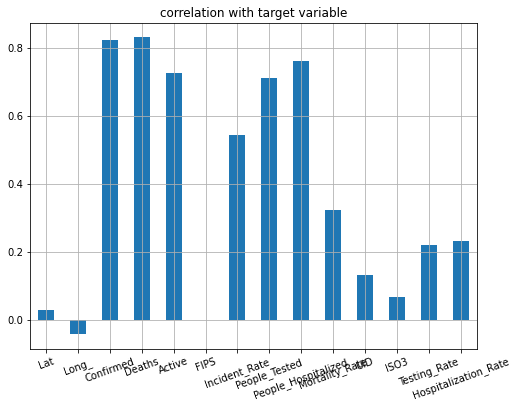

In [202]:
plt.figure(figsize=(8,6))
covid_df.drop('Recovered', axis =1).corrwith(covid_df['Recovered']).plot(kind='bar', grid=True)
plt.xticks(rotation=20)
plt.title('correlation with target variable')

Confirmed and Deaths are highly correlated to recoved cases.

#### summary of deaths  and recovery location wise

In [223]:
confirmed = covid_df.groupby('Province_State').sum()['Confirmed'].reset_index()
deaths = covid_df.groupby('Province_State').sum()['Deaths'].reset_index()
recovered = covid_df.groupby('Province_State').sum()['Recovered'].reset_index()

In [224]:
fig = go.Figure()
fig.add_trace(go.Bar(x=confirmed['Province_State'],
                y=confirmed['Confirmed'],
                name='Confirmed',
                marker_color='blue'
                ))
fig.add_trace(go.Bar(x=deaths['Province_State'],
                y=deaths['Deaths'],
                name='Deaths',
                marker_color='Red'
                ))
fig.add_trace(go.Bar(x=recovered['Province_State'],
                y=recovered['Recovered'],
                name='Recovered',
                marker_color='Green'
                ))

fig.update_layout(
    title='Worldwide Corona Virus Cases - Confirmed, Deaths, Recovered (Bar Chart)',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of Cases',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()

In [225]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=confirmed['Province_State'], 
                         y=confirmed['Confirmed'],
                         mode='lines+markers',
                         name='Confirmed',
                         line=dict(color='blue', width=2)
                        ))
fig.add_trace(go.Scatter(x=deaths['Province_State'], 
                         y=deaths['Deaths'],
                         mode='lines+markers',
                         name='Deaths',
                         line=dict(color='Red', width=2)
                        ))
fig.add_trace(go.Scatter(x=recovered['Province_State'], 
                         y=recovered['Recovered'],
                         mode='lines+markers',
                         name='Recovered',
                         line=dict(color='Green', width=2)
                        ))
fig.update_layout(
    title='Worldwide Corona Virus Cases - Confirmed, Deaths, Recovered (Line Chart)',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of Cases',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    )
)
fig.show()

In [226]:
import folium
center = [37.0902405, -95.7128906]
m = folium.Map(location = center, zoom_start = 3)

for lat, lng in zip(covid_df.Lat, covid_df.Long_):
    folium.CircleMarker(
        [lat, lng],
        radius = 5,
        fill = True,
        color = 'Black',
        fill_color = 'red',
        fill_opacity = 0.6
        ).add_to(m)
    
m

In [227]:
#statewise_cases
state_details = pd.pivot_table(covid_df, values=['Confirmed','Deaths','Recovered'], index='Province_State', aggfunc='max')
state_details['Recovery Rate'] = round(state_details['Recovered'] / state_details['Confirmed'],2)
state_details['Death Rate'] = round(state_details['Deaths'] /state_details['Confirmed'], 2)
state_details = state_details.sort_values(by='Confirmed', ascending= False)
state_details.style.background_gradient(cmap='YlOrRd')

,Confirmed,Deaths,Recovered,Recovery Rate,Death Rate
Province_State,,,,,
New York,354370,28636,61886.000000,0.170000,0.080000
New Jersey,150776,10749,23945.000000,0.160000,0.070000
Illinois,100418,4525,7007.428571,0.070000,0.050000
Massachusetts,88970,6066,7007.428571,0.080000,0.070000
California,85997,3497,7007.428571,0.080000,0.040000
Pennsylvania,68126,4770,7007.428571,0.100000,0.070000
Michigan,53009,5060,28234.000000,0.530000,0.100000
Texas,51673,1426,30341.000000,0.590000,0.030000
Florida,47471,2096,7007.428571,0.150000,0.040000


In [228]:
covid_df.head()

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,32.3182,-86.9023,13052,522,7007.428571,12530.0,1,266.194321,164450.0,1493.000000,3.999387,84000001,4,3353.942386,11.438860
1,Alaska,61.3707,-152.4044,401,10,352.000000,39.0,2,54.815493,37045.0,4897.454545,2.493766,84000002,4,5063.940017,14.342541
2,American Samoa,-14.2710,-170.1320,0,0,7007.428571,0.0,60,0.000000,124.0,4897.454545,4.458248,16,0,222.857246,14.342541
3,Arizona,33.7298,-111.4312,14906,747,3773.000000,10386.0,4,204.788838,165435.0,1792.000000,5.011405,84000004,4,2272.859351,12.022005
4,Arkansas,34.9697,-92.3731,5003,107,3852.000000,1044.0,5,165.782801,96258.0,535.000000,2.138717,84000005,4,3189.670370,10.693584


## Predicting best Model

predicting model by considering "Deaths" as target

In [229]:
df_x = covid_df.drop(['Deaths', 'Province_State'], axis = 1)

In [230]:
y = covid_df['Deaths']

In [231]:
#Scaling data set
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_x)
x=sc.transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x

,Lat,Long_,Confirmed,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,-0.426523,-3.499823e-02,-0.262999,0.000000,-0.184202,-0.190472,-3.316157e-01,-0.211042,-0.347605,-2.187272e-01,0.306995,0.217199,-0.286981,-7.744974e-01
1,2.313830,-1.386934e+00,-0.505788,-0.678048,-0.489329,-0.190414,-8.706685e-01,-0.648930,0.000000,-9.364182e-01,0.306995,0.217199,0.621380,-4.738067e-16
2,-4.821011,-1.752824e+00,-0.513484,0.000000,-0.490281,-0.187053,-1.010458e+00,-0.775826,0.000000,4.233718e-16,-3.255783,-5.381703,-1.950231,-4.738067e-16
3,-0.293375,-5.412643e-01,-0.227419,-0.329520,-0.236575,-0.190298,-4.882104e-01,-0.207656,-0.317076,2.636756e-01,0.306995,0.217199,-0.861258,-6.189556e-01
4,-0.176423,-1.479132e-01,-0.417470,-0.321472,-0.464779,-0.190240,-5.876826e-01,-0.445416,-0.445419,-1.105661e+00,0.306995,0.217199,-0.374243,-9.732845e-01
5,-0.068280,-7.115490e-01,1.136910,0.000000,1.525002,-0.190182,-4.554209e-01,3.967184,0.000000,-1.867739e-01,0.306995,0.217199,-0.213169,-4.738067e-16
6,0.209372,-4.149480e-01,-0.075980,-0.359574,-0.050094,-0.190066,-9.249085e-04,-0.323132,-0.096227,5.910142e-01,0.306995,0.217199,-0.852504,8.018508e-01
7,0.448767,2.569878e-01,0.235303,-0.075740,0.223593,-0.190008,1.780346e+00,-0.120759,0.617574,2.186279e+00,0.306996,0.217199,0.772966,3.657367e+00
8,0.233774,2.001938e-01,-0.356231,-0.309959,-0.394549,-0.189950,1.135455e+00,-0.620172,0.000000,-3.217513e-01,0.306996,0.217199,0.408692,-4.738067e-16
9,0.000000,-2.933060e-16,-0.512544,0.000000,-0.489084,4.960121,2.899212e-16,0.000000,0.000000,-2.125132e+00,0.310765,0.217199,0.000000,-4.738067e-16


In [232]:
Model = [DecisionTreeRegressor(), KNeighborsRegressor(), AdaBoostRegressor(), LinearRegression(), GradientBoostingRegressor()]
max_r2_score = 0
for r_state in range(40,90):
    train_x, test_x, train_y, test_y = train_test_split(x,y,random_state = r_state,test_size = 0.33)
    for i in Model:
        i.fit(train_x,train_y)
        pre = i.predict(test_x)
        r2_sc= r2_score(test_y,pre)
        print('R2 score correspond to random state ' , r_state, 'is ' , r2_sc)
        if r2_sc> max_r2_score:
            max_r2_score=r2_sc
            final_state = r_state
            final_model = i
            
print()
print()
print()
print()
print('max R2 score correspond to random state ' , final_state, 'is ', max_r2_score, " and model is ", final_model)

R2 score correspond to random state  40 is  0.5650798391591534
R2 score correspond to random state  40 is  0.2715309323921541
R2 score correspond to random state  40 is  0.5710810748811488
R2 score correspond to random state  40 is  0.9530889110647391
R2 score correspond to random state  40 is  0.5461142791705913
R2 score correspond to random state  41 is  0.8669759788566727
R2 score correspond to random state  41 is  0.7207828437266042
R2 score correspond to random state  41 is  0.7545778935524534
R2 score correspond to random state  41 is  0.7984241153508274
R2 score correspond to random state  41 is  0.08483168826709897
R2 score correspond to random state  42 is  0.14476839825401078
R2 score correspond to random state  42 is  0.10160013289086511
R2 score correspond to random state  42 is  0.2644553069213923
R2 score correspond to random state  42 is  0.9126936572433235
R2 score correspond to random state  42 is  0.21572085349910552
R2 score correspond to random state  43 is  -2.3777

R2 score correspond to random state  66 is  0.7667074370203747
R2 score correspond to random state  66 is  0.9407820917517464
R2 score correspond to random state  66 is  0.9327161331356638
R2 score correspond to random state  67 is  0.8765531338278864
R2 score correspond to random state  67 is  0.7448620528165679
R2 score correspond to random state  67 is  0.8137303407781176
R2 score correspond to random state  67 is  -2.343408820376167
R2 score correspond to random state  67 is  0.8654755384372763
R2 score correspond to random state  68 is  -1.6285978892365605
R2 score correspond to random state  68 is  0.5375708101731786
R2 score correspond to random state  68 is  0.7320086634189269
R2 score correspond to random state  68 is  0.9045020916678286
R2 score correspond to random state  68 is  0.8727878155739762
R2 score correspond to random state  69 is  0.29797798939083364
R2 score correspond to random state  69 is  0.1795177512500855
R2 score correspond to random state  69 is  0.2747458

In [233]:
train_x, test_x, train_y, test_y = train_test_split(x,y,random_state = 74,test_size = 0.33)
lr = LinearRegression()
reg = lr.fit(x, y)
y_pred = lr.predict(test_x)
reg.score(x, y)

0.9928419665430951

Score of the Linear regression is 99.284

#### evaluating linear regression with R Square/Adjusted R Square metrics

In [234]:
X_addC = sm.add_constant(x)
result = sm.OLS(y, X_addC).fit()
print(result.rsquared, result.rsquared_adj)

0.9928419665430951 0.9905114440222423


we can interpret that around 99% of dependent variability can be explain by the model and adjusted R Square is roughly the same as R Square meaning the model is quite robust.

### predicting model by considering "Recovered" as target

In [235]:
df_x = covid_df.drop(['Recovered', 'Province_State'], axis = 1)

In [236]:
y = covid_df['Recovered']

In [237]:
#Scaling data set
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_x)
x=sc.transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x

,Lat,Long_,Confirmed,Deaths,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,-0.426523,-3.499823e-02,-0.262999,-0.268934,-0.184202,-0.190472,-3.316157e-01,-0.211042,-0.347605,-2.187272e-01,0.306995,0.217199,-0.286981,-7.744974e-01
1,2.313830,-1.386934e+00,-0.505788,-0.395373,-0.489329,-0.190414,-8.706685e-01,-0.648930,0.000000,-9.364182e-01,0.306995,0.217199,0.621380,-4.738067e-16
2,-4.821011,-1.752824e+00,-0.513484,-0.397843,-0.490281,-0.187053,-1.010458e+00,-0.775826,0.000000,4.233718e-16,-3.255783,-5.381703,-1.950231,-4.738067e-16
3,-0.293375,-5.412643e-01,-0.227419,-0.213370,-0.236575,-0.190298,-4.882104e-01,-0.207656,-0.317076,2.636756e-01,0.306995,0.217199,-0.861258,-6.189556e-01
4,-0.176423,-1.479132e-01,-0.417470,-0.371419,-0.464779,-0.190240,-5.876826e-01,-0.445416,-0.445419,-1.105661e+00,0.306995,0.217199,-0.374243,-9.732845e-01
5,-0.068280,-7.115490e-01,1.136910,0.465746,1.525002,-0.190182,-4.554209e-01,3.967184,0.000000,-1.867739e-01,0.306995,0.217199,-0.213169,-4.738067e-16
6,0.209372,-4.149480e-01,-0.075980,-0.077053,-0.050094,-0.190066,-9.249085e-04,-0.323132,-0.096227,5.910142e-01,0.306995,0.217199,-0.852504,8.018508e-01
7,0.448767,2.569878e-01,0.235303,0.473648,0.223593,-0.190008,1.780346e+00,-0.120759,0.617574,2.186279e+00,0.306996,0.217199,0.772966,3.657367e+00
8,0.233774,2.001938e-01,-0.356231,-0.321288,-0.394549,-0.189950,1.135455e+00,-0.620172,0.000000,-3.217513e-01,0.306996,0.217199,0.408692,-4.738067e-16
9,0.000000,-2.933060e-16,-0.512544,-0.397843,-0.489084,4.960121,2.899212e-16,0.000000,0.000000,-2.125132e+00,0.310765,0.217199,0.000000,-4.738067e-16


In [238]:
Model = [DecisionTreeRegressor(), KNeighborsRegressor(), AdaBoostRegressor(), LinearRegression(), GradientBoostingRegressor()]
max_r2_score = 0
for r_state in range(40,90):
    train_x, test_x, train_y, test_y = train_test_split(x,y,random_state = r_state,test_size = 0.33)
    for i in Model:
        i.fit(train_x,train_y)
        pre = i.predict(test_x)
        r2_sc= r2_score(test_y,pre)
        print('R2 score correspond to random state ' , r_state, 'is ' , r2_sc)
        if r2_sc> max_r2_score:
            max_r2_score=r2_sc
            final_state = r_state
            final_model = i
            
print()
print()
print()
print()
print('max R2 score correspond to random state ' , final_state, 'is ', max_r2_score, " and model is ", final_model)

R2 score correspond to random state  40 is  0.3594672979092369
R2 score correspond to random state  40 is  0.14353869821683463
R2 score correspond to random state  40 is  0.38215867225878697
R2 score correspond to random state  40 is  0.7592014406933132
R2 score correspond to random state  40 is  0.38983817795309195
R2 score correspond to random state  41 is  -14.720776339181155
R2 score correspond to random state  41 is  -0.26356015766876295
R2 score correspond to random state  41 is  0.28043809304186673
R2 score correspond to random state  41 is  0.18104458564617554
R2 score correspond to random state  41 is  0.049679135587443524
R2 score correspond to random state  42 is  -0.069618362711932
R2 score correspond to random state  42 is  0.06297998300317198
R2 score correspond to random state  42 is  -0.21857798676441065
R2 score correspond to random state  42 is  0.8453865497690625
R2 score correspond to random state  42 is  0.0018674354268526372
R2 score correspond to random state  43

R2 score correspond to random state  66 is  0.22591309233966927
R2 score correspond to random state  66 is  0.7458279754027448
R2 score correspond to random state  66 is  -0.36105142221117204
R2 score correspond to random state  67 is  -0.44579648158723906
R2 score correspond to random state  67 is  -0.05413858075535938
R2 score correspond to random state  67 is  0.026580952762646715
R2 score correspond to random state  67 is  0.11309779603539094
R2 score correspond to random state  67 is  -0.5130778321573053
R2 score correspond to random state  68 is  0.07451993329308826
R2 score correspond to random state  68 is  0.31367642371345816
R2 score correspond to random state  68 is  0.266668635433134
R2 score correspond to random state  68 is  0.8016170685170174
R2 score correspond to random state  68 is  0.5434069294503863
R2 score correspond to random state  69 is  0.023275794706059783
R2 score correspond to random state  69 is  0.17104550391137519
R2 score correspond to random state  69 

In [242]:
train_x, test_x, train_y, test_y = train_test_split(x,y,random_state = 77,test_size = 0.33)
lr = LinearRegression()
reg = lr.fit(x, y)
y_pred = lr.predict(test_x)
reg.score(x, y)

0.9613529507705867

Score of the Linear regression is 96.135

#### evaluating linear regression with R Square/Adjusted R Square metrics

In [243]:
X_addC = sm.add_constant(x)
result = sm.OLS(y, X_addC).fit()
print(result.rsquared, result.rsquared_adj)

0.9613529507705867 0.9487701905563591


we can interpret that around 96.135% of dependent variability can be explain by the model and adjusted R Square is 94.87% almost nearer to R Square meaning the model is quite robust.

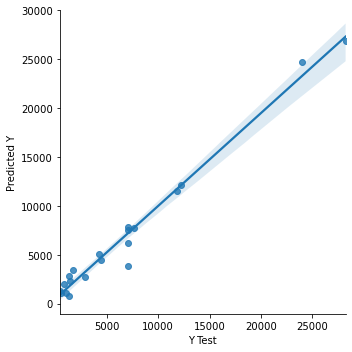

In [244]:
#plt.scatter(x=test_y, y=Kn_pred)
data = pd.DataFrame({'Y Test':test_y , 'Predicted Y':y_pred},columns=['Y Test','Predicted Y'])
sns.lmplot(x='Y Test',y='Predicted Y',data=data,palette='rainbow')